Replicate Policy Impact in KW94 page 667:
"a 500 dollar per-perod subsidy assuming data set one paramters increases schooling by 1.44 periods"

In [26]:
%matplotlib inline
import json
import numpy as np
import pandas as pd
import respy as rp

from python.mc_uncertainty_propagation import *
from python.model_wrapper import model_wrapper_kw_94
from python.cov_matrix import create_cov_matrix
from python.distplot import distplot
from python.convergence_plot import convergence_plot

In [27]:
params, options = rp.get_example_model("kw_94_three", with_data=False)

In [28]:
# params.loc[('shocks', 'sd_a'), 'comment']
params

value  \
category    name                                 
delta       delta                        0.950   
wage_a      constant                     8.000   
            exp_edu                      0.070   
            exp_a                        0.055   
            exp_a_square                 0.000   
            exp_b                        0.000   
            exp_b_square                 0.000   
wage_b      constant                     7.900   
            exp_edu                      0.070   
            exp_b                        0.060   
            exp_b_square                 0.000   
            exp_a                        0.055   
            exp_a_square                 0.000   
nonpec_edu  constant                  5000.000   
            at_least_twelve_exp_edu  -5000.000   
            not_edu_last_period     -20000.000   
nonpec_home constant                 21500.000   
shocks      sd_a                         1.000   
            sd_b                         1.000   
            sd_edu                    7000.000   
            sd_home                   8500.000   
            corr_b_a                     0.500   
            corr_edu_a                   0.000   
            corr_edu_b                   0.000   
            corr_home_a                  0.000   
            corr_home_b                  0.000   
            corr_home_edu               -0.500   
meas_error  sd_a                         1.000   
            sd_b                         1.000   

                                                                               comment  
category    name                                                                        
delta       delta                                                      discount factor  
wage_a      constant                                               log of rental price  
            exp_edu                          return to an additional year of schooling  
            exp_a                                     return to same sector experience  
            exp_a_square                   return to same sector, quadratic experience  
            exp_b                                    return to other sector experience  
            exp_b_square                  return to other sector, quadratic experience  
wage_b      constant                                               log of rental price  
            exp_edu                          return to an additional year of schooling  
            exp_b                                     return to same sector experience  
            exp_b_square                   return to same sector, quadratic experience  
            exp_a                                    return to other sector experience  
            exp_a_square                  return to other sector, quadratic experience  
nonpec_edu  constant                            constant reward for choosing education  
            at_least_twelve_exp_edu        reward for going to college (tuition, etc.)  
            not_edu_last_period                        reward for going back to school  
nonpec_home constant                         constant reward of non-market alternative  
shocks      sd_a                     Element 1,1 of standard-deviation/correlation ...  
            sd_b                     Element 2,2 of standard-deviation/correlation ...  
            sd_edu                   Element 3,3 of standard-deviation/correlation ...  
            sd_home                  Element 4,4 of standard-deviation/correlation ...  
            corr_b_a                 Element 2,1 of standard-deviation/correlation ...  
            corr_edu_a               Element 3,1 of standard-deviation/correlation ...  
            corr_edu_b               Element 3,2 of standard-deviation/correlation ...  
            corr_home_a              Element 4,1 of standard-deviation/correlation ...  
            corr_home_b              Element 4,2 of standard-deviation/correlation ... 

In [29]:
expected_qoi = model_wrapper_kw_94(params["value"].to_numpy())

In [30]:
expected_qoi

0.36824999999999997

In [31]:
cov_df = create_cov_matrix()

In [32]:
#cov_df

In [33]:
# get mean vector from KW94 table4.2 vecor. 
# Note that respy has 3 params more (delta, sd_a, sd_b) and 
#that it does not have cholesky-elements but sds and corrs. 
# it also transforms cross-experiences by (-1)
df = pd.read_csv("csv/table43_kw_94.csv", sep=",")
mean = pd.Series(data=df["true"].values, index=df["parameter"].values)

In [34]:
ds3 = transform_params_kw94_respy(mean)

In [35]:
ds3

category     name                   
delta        delta                          0.950000
wage_a       constant                       8.000000
             exp_edu                        0.070000
             exp_a                          0.055000
             exp_a_square                  -0.000000
             exp_b                          0.000000
             exp_b_square                  -0.000000
wage_b       constant                       7.900000
             exp_edu                        0.070000
             exp_b                          0.060000
             exp_b_square                  -0.000000
             exp_a                          0.550000
             exp_a_square                  -0.000000
nonpec_edu   constant                    5000.000000
             at_least_twelve_exp_edu    -5000.000000
             not_edu_last_period       -20000.000000
nonpec_home  constant                   21500.000000
shocks       sd_a                           1.000000
         

In [11]:
draw = np.random.multivariate_normal(mean, cov_df)

In [12]:
draw

array([ 7.99699073e+00,  7.02392098e-02,  5.49083807e-02, -2.77853843e-06,
        2.00343273e-03,  7.05719170e-05,  7.89869223e+00,  7.00683135e-02,
        6.01097516e-02,  9.11762687e-07,  5.49862005e-01, -9.17761005e-06,
        4.90592301e+03,  4.95051102e+03,  2.00027221e+04,  2.14703404e+04,
        1.00153513e+00,  4.90335045e-01,  8.66918931e-01, -1.78346632e-01,
        1.50133751e-01,  6.96279914e+03,  7.65990009e-02,  1.06111251e-01,
       -4.25103144e+03,  7.24971473e+03])

In [13]:
kw94_params = pd.Series(data=draw, index=df["parameter"].values)


In [14]:
kw94_params

alpha10    7.996991e+00
alpha11    7.023921e-02
alpha12    5.490838e-02
alpha13   -2.778538e-06
alpha14    2.003433e-03
alpha15    7.057192e-05
alpha20    7.898692e+00
alpha21    7.006831e-02
alpha22    6.010975e-02
alpha23    9.117627e-07
alpha24    5.498620e-01
alpha25   -9.177610e-06
beta0      4.905923e+03
beta1      4.950511e+03
beta2      2.000272e+04
gamma0     2.147034e+04
a11        1.001535e+00
a21        4.903350e-01
a22        8.669189e-01
a31       -1.783466e-01
a32        1.501338e-01
a33        6.962799e+03
a41        7.659900e-02
a42        1.061113e-01
a43       -4.251031e+03
a44        7.249715e+03
dtype: float64

In [15]:
respy_params = transform_params_kw94_respy(kw94_params)

In [16]:
respy_params

category     name                   
delta        delta                      9.500000e-01
wage_a       constant                   7.996991e+00
             exp_edu                    7.023921e-02
             exp_a                      5.490838e-02
             exp_a_square               2.778538e-06
             exp_b                      2.003433e-03
             exp_b_square              -7.057192e-05
wage_b       constant                   7.898692e+00
             exp_edu                    7.006831e-02
             exp_b                      6.010975e-02
             exp_b_square              -9.117627e-07
             exp_a                      5.498620e-01
             exp_a_square               9.177610e-06
nonpec_edu   constant                   4.905923e+03
             at_least_twelve_exp_edu   -4.950511e+03
             not_edu_last_period       -2.000272e+04
nonpec_home  constant                   2.147034e+04
shocks       sd_a                       1.001535e+00
         

In [17]:
qoi_debug = model_wrapper_kw_94(respy_params)

In [18]:
qoi_debug

0.0

In [19]:
qoi = mc_uncertainty_propagation(mean, cov_df, 10, save_json=True)

In [20]:
#qoi_list

In [21]:
#with open("json/qoi.json", "r") as read_file:
#    qoi = json.load(read_file)

In [22]:
len(qoi)

10

<module 'matplotlib.pyplot' from 'C:\\Users\\Tobias\\AppData\\Local\\conda\\conda\\envs\\uq\\lib\\site-packages\\matplotlib\\pyplot.py'>

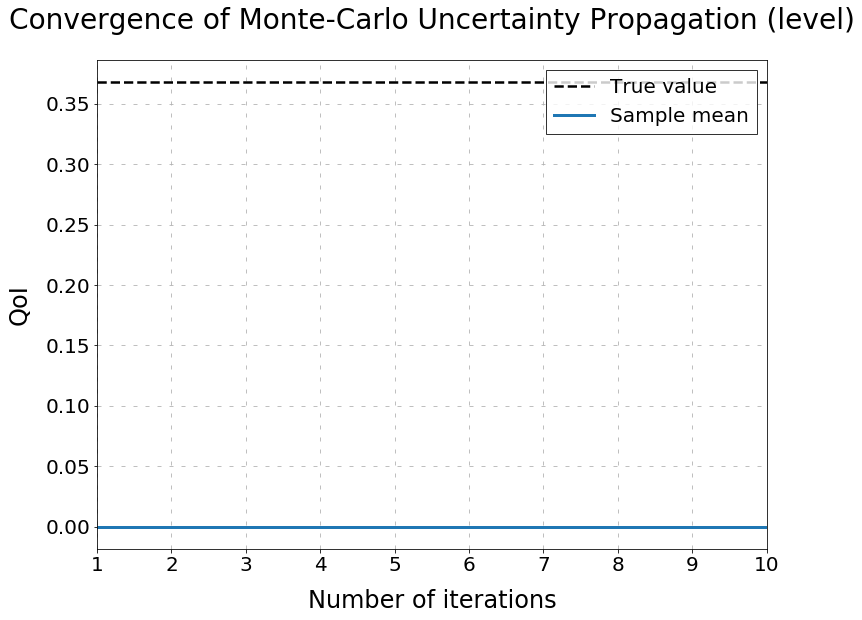

In [23]:
convergence_plot(qoi, expected_qoi, "QoI")

<module 'matplotlib.pyplot' from 'C:\\Users\\Tobias\\AppData\\Local\\conda\\conda\\envs\\uq\\lib\\site-packages\\matplotlib\\pyplot.py'>

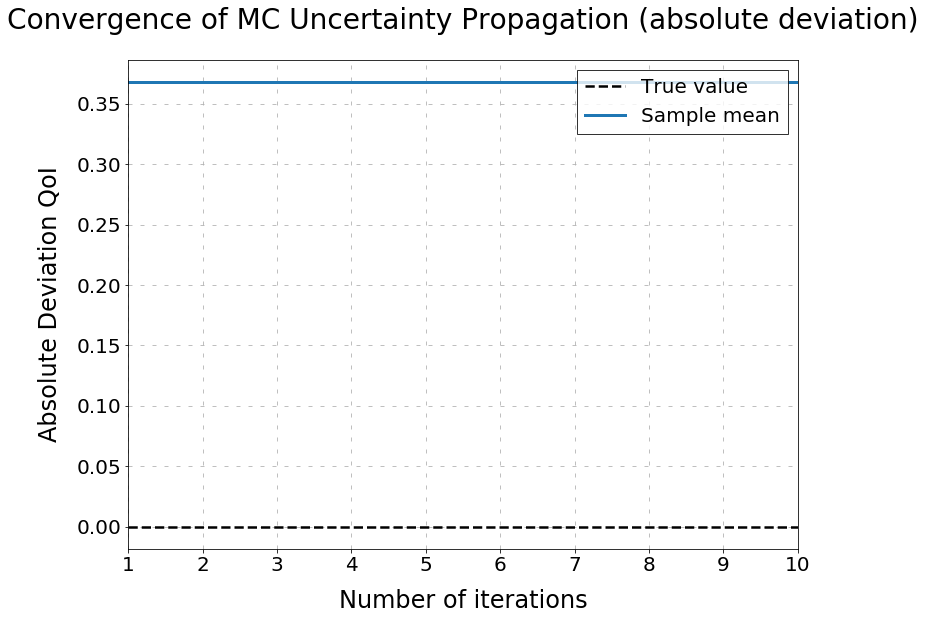

In [24]:
convergence_plot(qoi, expected_qoi, "Absolute Deviation QoI", absolute_deviation=True)

C:\Users\Tobias\AppData\Local\conda\conda\envs\uq\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Tobias\AppData\Local\conda\conda\envs\uq\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


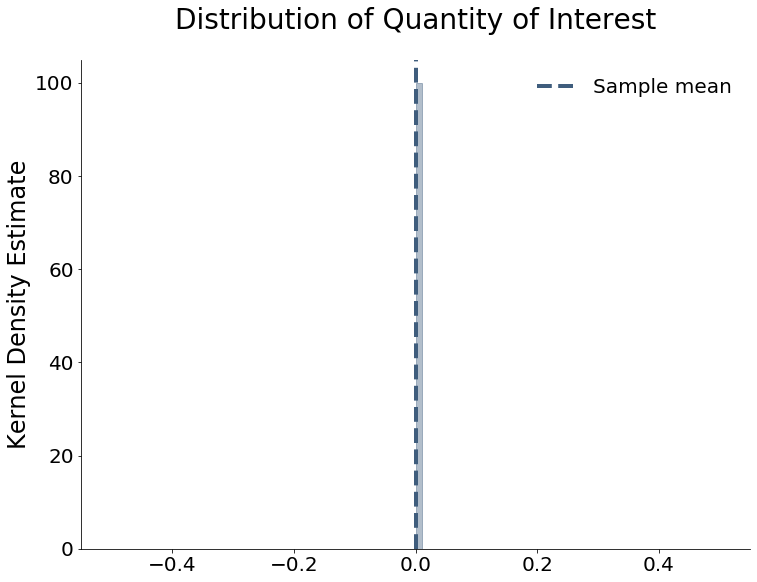

In [25]:
distplot(qoi)